# Notion d'Echantillonnage

## Population étudiée

Nous étudions dans une population de points de couleur noire et rouge le caractère rouge.<BR>
On considère une population de 200 points noirs et 50 points rouges

In [9]:
%pylab
# population de départ
npts = [200,50]

# taille des échantillons
taille=30

# Nombre d'échantilllons à fabriquer
n_exp=50

ImportError: No module named 'matplotlib'

In [5]:
from random import random
col=['black','red']
points=[]
for i in range(2):
    for j in range(npts[i]):
        x=random()*6-3
        y=random()*6-3
        points.append((x,y,col[i]))
            
print("Un point ressemble à ceci : ",points[0])

Un point ressemble à ceci :  (0.8151750954038377, 0.04873521035371464, 'black')


Voici à quoi ressemble cette population :

In [7]:
import matplotlib as plt
# Mise en forme des données pour accélerer le tracé
pxnoir,pxrouge,pynoir,pyrouge=[],[],[],[]
for i in points:
    if i[2]=='black':
        pxnoir.append(i[0])
        pynoir.append(i[1])
    else:
        pxrouge.append(i[0])
        pyrouge.append(i[1])
        
plt.scatter(pxnoir,pynoir,marker='o',c='black',s=40)
plt.scatter(pxrouge,pyrouge,marker='o',c='red',s=40)
axis('equal')
axis([-3,3, -3, 3])

ImportError: No module named 'matplotlib'

## Fabrication d'un échantillon

A présent, prélevons un échantillon de quelques points aléatoirement dans notre population de points.<BR>
Nous effections un tirage sans remise.

In [18]:
def prendreEchantillon(taille):
    points1=points.copy()
    echantillon=[]
    for i in range(taille):
        echantillon.append(points1.pop(randint(len(points1))))
    return echantillon

echantillon=prendreEchantillon(taille)

[-3, 3, -3, 3]

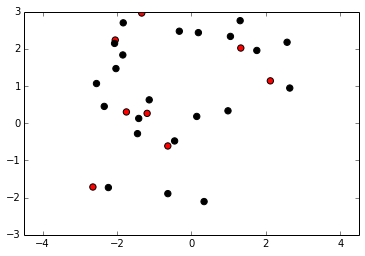

In [34]:
for i in echantillon:
    plt.scatter(i[0],i[1],marker='o',c=i[2],s=40)
    
axis('equal')
axis([-3,3, -3, 3])

Fabriquons une fonction pour compter les points rouges d'un échantillon

In [20]:
def compteRouge(ech):
    nb=0
    for i in ech:
        if i[2]=='red':
            nb+=1
    return nb

print ("Il y a ",compteRouge(echantillon), " points rouges dans l'échantillon")

Il y a  9  points rouges dans l'échantillon


Avons-nous la m&ecirc;me proportion de points rouges dans notre échantillon que dans la population de départ ?

In [21]:
print("Dans la population de départ nous avons une fréquence de ",npts[1]/sum(npts))
print("Dans l'échantillon nous avons une fréquence de ",compteRouge(echantillon)/taille)

Dans la population de départ nous avons une fréquence de  0.2
Dans l'échantillon nous avons une fréquence de  0.3


## Fluctuation d'échantillonnage

Devons-nous nous étonner de cette différence ?<BR>
Reproduisons plusieurs fois l'expérience et calculons pour chaque expérience la fréquence d'apparition des points rouge dans l'échantillon.

In [22]:
freqs=[]
for i in range(n_exp):
    echantillon=prendreEchantillon(taille)
    freqs.append(compteRouge(echantillon)/taille)
print(freqs)

[0.2, 0.16666666666666666, 0.16666666666666666, 0.2, 0.23333333333333334, 0.26666666666666666, 0.23333333333333334, 0.16666666666666666, 0.2, 0.13333333333333333, 0.16666666666666666, 0.23333333333333334, 0.16666666666666666, 0.26666666666666666, 0.13333333333333333, 0.36666666666666664, 0.2, 0.23333333333333334, 0.26666666666666666, 0.1, 0.16666666666666666, 0.06666666666666667, 0.16666666666666666, 0.13333333333333333, 0.2, 0.26666666666666666, 0.16666666666666666, 0.16666666666666666, 0.06666666666666667, 0.23333333333333334, 0.1, 0.2, 0.2, 0.2, 0.16666666666666666, 0.13333333333333333, 0.16666666666666666, 0.23333333333333334, 0.23333333333333334, 0.16666666666666666, 0.26666666666666666, 0.23333333333333334, 0.23333333333333334, 0.2, 0.03333333333333333, 0.2, 0.23333333333333334, 0.16666666666666666, 0.23333333333333334, 0.26666666666666666]


Visualisons ces fréquences sur un graphique.

[0, 50, 0, 1]

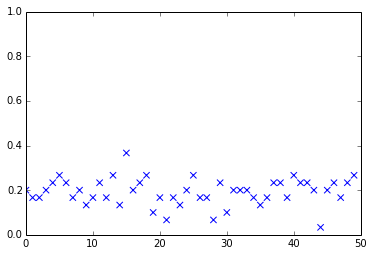

In [31]:
scatter(range(n_exp),freqs,marker='x',c='blue',s=40)
axis([0,n_exp, 0, 1])

## Intervalle de fluctuation : Rappel de seconde

En seconde, vous avez vu que les fréquences observées dans l'échantillon <b>fluctuaient</b> à l'intérieur d'un intervalle dont la largeur dépend de la taille de l'échantillon :

$$I=\left[p-\dfrac{1}{\sqrt n};p+\dfrac{1}{\sqrt n}\right]$$

In [24]:
p=npts[1]/sum(npts)
I=[p-1/sqrt(taille),p+1/sqrt(taille)]
print("I=",I)

I= [0.017425814164944653, 0.38257418583505537]


Visualisons cet intervalle sur le graphique précédent

[0, 50, 0, 1]

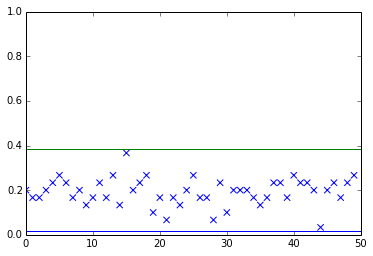

In [32]:
scatter(range(n_exp),freqs,marker='x',c='blue',s=40)
plot((0,n_exp),(I[0],I[0]))
plot((0,n_exp),(I[1],I[1]))
axis([0,n_exp, 0, 1])

L'intervalle de fluctuation contient la plupart des échantillons.<BR>
En réalité la probabilité qu'un échantillon sorte de cet intervalle n'est que de 5%.<BR>
Dénombrons dans le cadre de notre expérience le nombre d'échantillons en dehors de l'intervalle :

In [26]:
HorsIntervalle=[e for e in freqs if e<I[0] or e>I[1]]
d=len(HorsIntervalle)
print ("Il y a ",d, " échantillons hors de l'intervalle de fluctuation, soit", d/n_exp*100,"%" )

Il y a  0  échantillons hors de l'intervalle de fluctuation, soit 0.0 %


A présent, modifiez les paramètres de l'expérience fixés au début et observez le résultat.